AIDA CAPSTONE PROJECT BOLA-DADDYSON
CNN VERSION 1

In [2]:
!pip install tensorflow==2.15.0 tensorflow-hub keras==2.15.0

DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [3]:
import zipfile
import os
!pip install patool
import patoolib

# Path to the uploaded zip file
zip_file_path = "C:/Users/BOLA OLATUNJI/Documents/ACADEMIC/SCHOOL/Canada/ACADEMIC SASK/FALL SEMESTER 2024/FRI PROJ 613 CAPSTONE/MODELS/CNN/AIDA CAPSTONEv3.rar"

# Extract all files to a directory
# Use patoolib to extract rar files
patoolib.extract_archive(zip_file_path, outdir="/content/unzipped_files")

# List the extracted files
print(os.listdir("/content/unzipped_files"))


DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
INFO patool: Extracting C:/Users/BOLA OLATUNJI/Documents/ACADEMIC/SCHOOL/Canada/ACADEMIC SASK/FALL SEMESTER 2024/FRI PROJ 613 CAPSTONE/MODELS/CNN/AIDA CAPSTONEv3.rar ...
INFO patool: could not find a 'file' executable, falling back to guess mime type by file extension
INFO patool: running "C:\Program Files\WinRAR\rar.EXE" x -kb -or -- "C:\Users\BOLA OLATUNJI\Documents\ACADEMIC\SCHOOL\Canada\ACADEMIC SASK\FALL SEMESTER 2024\FRI PROJ 613 CAPSTONE\MODELS\CNN\AIDA CAPSTONEv3.rar"


INFO patool: ... C:/Users/BOLA OLATUNJI/Documents/ACADEMIC/SCHOOL/Canada/ACADEMIC SASK/FALL SEMESTER 2024/FRI PROJ 613 CAPSTONE/MODELS/CNN/AIDA CAPSTONEv3.rar extracted to `/content/unzipped_files'.


['AIDA CAPSTONE.v1i.yolov11', 'AIDA CAPSTONEv2', 'AIDA CAPSTONEv3']


In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import matplotlib.pyplot as plt

In [5]:
base_dir = '/content/unzipped_files/AIDA CAPSTONEv2'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

In [6]:
validation_dir

'/content/unzipped_files/AIDA CAPSTONEv2\\validation'

In [7]:
#for Image
img_height, img_width = 224, 224 #Image size to conform to transfer learning
batch_size = 10
NUM_CLASSES = 2

train_ds, val_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size = (img_height, img_width),
    batch_size = batch_size,
    validation_split=0.1,
    subset="both",
    seed=123
)


test_ds = tf.keras.utils.image_dataset_from_directory(
    validation_dir,
    image_size = (img_height, img_width),
    batch_size = batch_size
)


Found 3228 files belonging to 2 classes.
Using 2906 files for training.
Using 322 files for validation.
Found 64 files belonging to 2 classes.


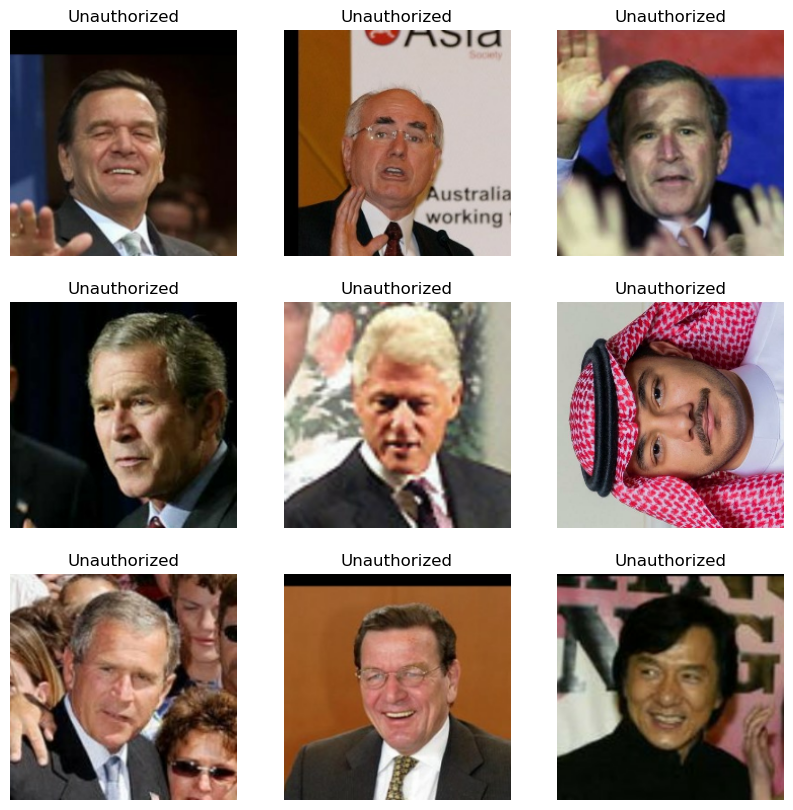

In [7]:
class_names = ["Authorized", "Unauthorized"]

plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import os
# Create a simple CNN model

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)

model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),  # Normalize pixel values
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',  # Correct loss for binary classification
    metrics=['accuracy']
)


# Train the model
EPOCHS = 2
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs = EPOCHS# Adjust the number of epochs as needed
)

# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(test_ds)
print(f"Test accuracy: {test_acc:.2f}")







Epoch 1/2


291/291 [==============================] - 101s 342ms/step - loss: 0.1590 - accuracy: 0.9776 - val_loss: 0.0799 - val_accuracy: 0.9720
Epoch 2/2
7/7 [==============================] - 1s 70ms/step - loss: 0.5807 - accuracy: 0.6875
Test accuracy: 0.69


In [9]:
model.evaluate(test_ds)

7/7 [==============================] - 0s 61ms/step - loss: 0.5807 - accuracy: 0.6875


[0.5806674957275391, 0.6875]

## Visualizing results of the training

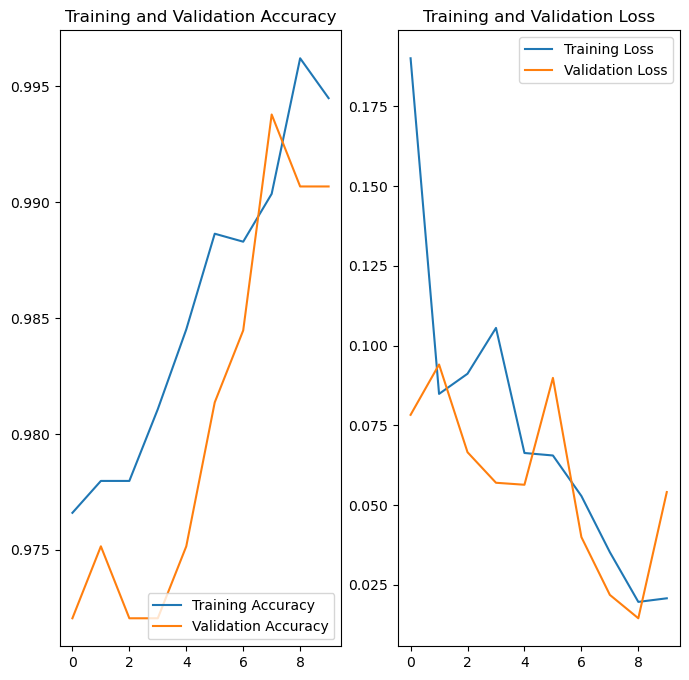

In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('./foo.png')
plt.show()

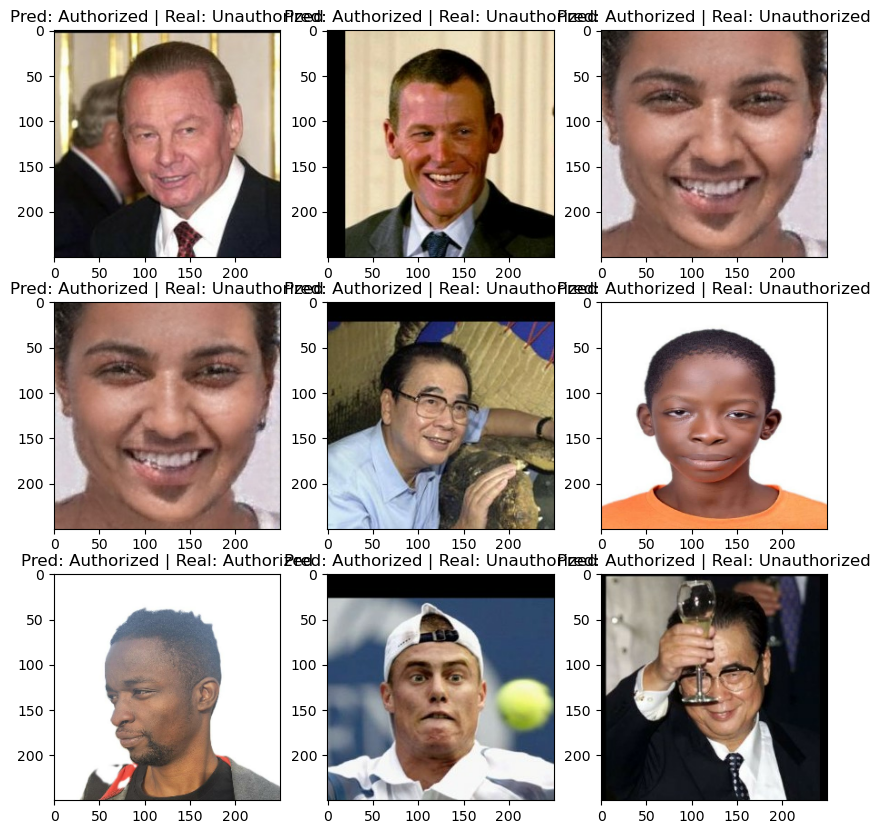

In [19]:
import numpy

plt.figure(figsize=(10,10))
for images, labels in test_ds.take(1):
  classifications = model(images)
  # print(classifications)

  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    index = numpy.argmax(classifications[i])
    plt.title("Pred: " + class_names[index] + " | Real: " + class_names[labels[i]])

# Save and Load trained models

## Save as Keras .h5 model

Ref: https://github.com/tensorflow/examples/blob/master/courses/udacity_intro_to_tensorflow_for_deep_learning/l07c01_saving_and_loading_models.ipynb

In [ ]:
'''import time

t = time.time()

export_path_keras = "./{}.h5".format(int(t))
print(export_path_keras)

model.save(export_path_keras, include_optimizer=True)

!ls'''

./1732208580.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


 1732208580.h5	'AIDA CAPSTONE.v1i.yolov11.rar'   foo.png   sample_data   unzipped_files


## Load Keras .h5 model and use for prediction

We will now load the model we just saved into a new model called reloaded. We will need to provide the file path and the custom_objects parameter. This parameter tells keras how to load the hub.KerasLayer from the feature_extractor we used for transfer learning.

In [ ]:
'''import tensorflow_hub as hub # Import the tensorflow_hub module
import tensorflow as tf
reloaded = tf.keras.models.load_model(
  export_path_keras,
  # `custom_objects` tells keras how to load a `hub.KerasLayer`
  custom_objects={'KerasLayer': hub.KerasLayer})

reloaded.summary()'''

In [ ]:
'''result_rs50 = model.evaluate(test_ds)
reloaded_result_rs50 = reloaded.evaluate(test_ds)'''

4/4 [==============================] - 0s 47ms/step - loss: 1.2527 - accuracy: 0.9167


In [3]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Load the trained model
#model = keras.models.load_model("C:/Users/BOLA OLATUNJI/Documents/ACADEMIC/SCHOOL/Canada/ACADEMIC SASK/FALL SEMESTER 2024/FRI PROJ 613 CAPSTONE/MODELS/CNN/1732208580.h5")
    
# Class names for predictions
#class_names = ["Authorized", "Unauthorized"]


def preprocess_image(image_path, img_size=(224, 224)):
    """
    Preprocess the input image to match the input size of the CNN model.
    Args:
        image_path (str): Path to the image file.
        img_size (tuple): Target size for resizing the image (default is (640, 640)).
    Returns:
        np.array: Preprocessed image ready for prediction.
    """
    # Load the image using OpenCV
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError(f"Unable to load image from path: {image_path}")
    
    # Resize the image to the required size
    img = cv2.resize(img, img_size)
    
    # Normalize pixel values to the range [0, 1]
    img = img / 255.0
    
    # Expand dimensions to match the model's input shape (1, height, width, channels)
    img = np.expand_dims(img, axis=0)
    
    return img

def predict_image(image_path):
    """
    Predict the class of the input image using the trained CNN model.
    Args:
        image_path (str): Path to the image file.
    """
    try:
        # Preprocess the image
        processed_image = preprocess_image(image_path)
        
        # Perform prediction
        predictions = model.predict(processed_image)
        
        # Get the index of the highest predicted class
        predicted_class = np.argmax(predictions[0])
        
        # Get the class name
        class_name = class_names[predicted_class]
        
        # Get the confidence score
        confidence_score = predictions[0][predicted_class] * 100
        
        print(f"Predicted Class: {class_name}")
        print(f"Confidence Score: {confidence_score:.2f}%")
    except Exception as e:
        print(f"Error during prediction: {e}")

# Example usage
# Replace 'path_to_image.jpg' with the path to your test image
image_path = "C:/Users/BOLA OLATUNJI/Documents/ACADEMIC/SCHOOL/Canada/ACADEMIC SASK/FALL SEMESTER 2024/FRI PROJ 613 CAPSTONE/MODELS/CNN/TEST2/455718079_10229671083974917_4938839240535204253_n.jpg"
predict_image(image_path)


Error during prediction: Unable to load image from path: C:/Users/BOLA OLATUNJI/Documents/ACADEMIC/SCHOOL/Canada/ACADEMIC SASK/FALL SEMESTER 2024/FRI PROJ 613 CAPSTONE/MODELS/CNN/TEST2/455718079_10229671083974917_4938839240535204253_n.jpg


In [14]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow import keras
# Set up webcam capture
cap = cv2.VideoCapture(0)
print("Camera opened:", cap.isOpened())

cap.set(cv2.CAP_PROP_FRAME_WIDTH, 224)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 224)

# Check if the webcam is opened correctly
if not cap.isOpened():
    print("Error: Could not open webcam.")
    exit()

while True:
    ret, frame = cap.read()
    if not ret:
        print("Error: Could not read frame.")
        break

    # Preprocess the frame
    input_width, input_height = 224, 224  # Replace with your model's input size
    resized_frame = cv2.resize(frame, (input_width, input_height))
    rgb_frame = cv2.cvtColor(resized_frame, cv2.COLOR_BGR2RGB)
    normalized_frame = rgb_frame / 255.0
    input_frame = np.expand_dims(normalized_frame, axis=0)

    # Model prediction
    prediction = model.predict(input_frame)
   

    confidence = np.max(prediction)
    if confidence > 0.5:  # Confidence threshold
        predicted_class = class_names[np.argmax(prediction)]
    else:
        predicted_class = "Unknown"

    # Display the prediction on the frame
    cv2.putText(frame, f"Prediction: {predicted_class}", (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)

    # Show the frame
    cv2.imshow('Live Prediction', frame)

    # Break loop on 'q' key press
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the webcam and close OpenCV windows
cap.release()
cv2.destroyAllWindows()

Camera opened: True
Error: Could not read frame.


In [ ]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow import keras
# Open webcam or video
input_width, input_height = 224, 224  # Replace with your model's input size
resized_frame = cv2.resize(frame, (input_width, input_height))
rgb_frame = cv2.cvtColor(resized_frame, cv2.COLOR_BGR2RGB)
normalized_frame = rgb_frame / 255.0
input_frame = np.expand_dims(normalized_frame, axis=0)

# Model prediction
prediction = model.predict(input_frame)
cap = cv2.VideoCapture(0)  # Change to a video path for video files
while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Run inference
    results = model(frame)

    # Display results
    annotated_frame = results[0].plot()
    cv2.imshow("prediction", annotated_frame)

    # Break on 'q' key
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


NameError: name 'cv2' is not defined